In [61]:
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN as DBSCAN
import pandas as pd
import numpy as np
import random
import cluster as cl

### CONSTANTS ###

DEBUG=False

### Datasets ###
    
def model2d(size=1000):
    X1 = []
    X2 = []
    
    lim = int(np.math.sqrt(size))
    for i in range(0,lim):
        for j in range(0,lim):
            f = (np.math.sin(i)+np.math.cos(j))+random.random()
            if f > 1.4:
                X1.append(i)
                X2.append(j)

    return np.array([X1,X2]).transpose()
    
def moons():
    import sklearn.datasets as datasets
    moons = datasets.make_moons()[0]
    
    return moons
    
def iris():
    import sklearn.datasets as datasets
    iris = datasets.load_iris()
    
    iris = iris.data[:,:2]

    x1,x2 = list(zip(*iris))
 

    return np.array([x1,x2]).transpose()

def model2d_small():
    X1 = [1,1,0,2,2,1,6,8,6,6,4,5,7,7,6]
    X2 = [1,2,1,2,1,3,7,5,8,5,9,3,7,6,6]

   
    return np.array([X1,X2]).transpose()

def count_labels(lbls):
    s = set(lbls)
    print("Labels: ",s)
    return len(s)



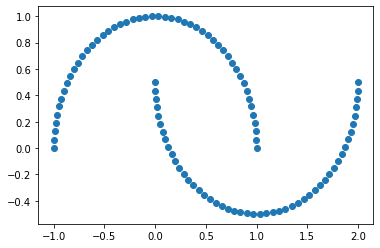

Custom DBSCAN done.
SKLearn DBSCAN done.


In [62]:
#select test dataset

df = moons()

plt.scatter(df.transpose()[0],df.transpose()[1])
plt.show()

#DBSCAN Parameters
eps = 0.3
numpts = 5


data, labels = cl.dbscan(df,eps=eps,numpts=numpts)
print("Custom DBSCAN done.")
skdbs = DBSCAN(eps=eps,min_samples=numpts)
print("SKLearn DBSCAN done.")
skdbs_labels = skdbs.fit_predict(df)


In [63]:
# Evaluate noise points and validate labels
noise_count = 0
l_noise_count = 0
sk_noise_count = 0
for i, v in enumerate(df):
    if DEBUG:
        print("Custom: ", labels[i],"SK Cluster: ",skdbs_labels[i]," -- [",v[i],"]")
    
    if labels[i] == -1:
        l_noise_count += 1
    if skdbs_labels[i] == -1:
        sk_noise_count += 1
    if labels[i] == -1 and skdbs_labels[i] == -1:
        noise_count+=1

if sk_noise_count+l_noise_count > 0:
    print("Noise match (%): ",noise_count*100*2/(sk_noise_count+l_noise_count))
print(count_labels(labels),"   ", count_labels(skdbs_labels))



Labels:  {0, 1}
Labels:  {0, 1}
2     2


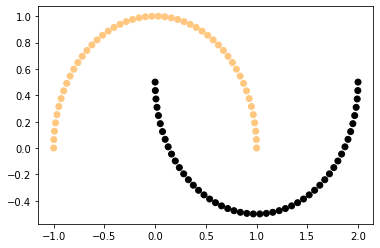

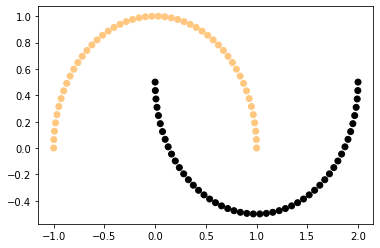

In [64]:

#Compare the two outputs visually
d = [[],[]]
for idx,i in enumerate(data):

    d[0].append(i[0])
    d[1].append(i[1])


plt.scatter(d[0],d[1],c=labels, cmap='copper')
plt.show()

plt.scatter(d[0],d[1],c=skdbs_labels,cmap='copper')
plt.show()